> **Importante**

Para este ejercicio se pide que comprendas las diferentes sentencias que se ejecutan, que interpretes los códigos, que comentes aquellos puntos del código que se puedan optimizar y mejoras que se podrían implementar con visión de negocio.

**No se trata de escribir código, simplemente argumentar y justificar mejoras. Tu función es de *code reviewer* y de comprensión de resultados.**


# Introducción a los datos

A cierre de mes hemos seleccionado una serie de contratos de nuestros clientes. Queremos estudiar que beneficio nos aportan según lo que gastan con su tarjeta (solo hay una tarjeta asignada para cada contrato). Cada contrato tiene un límite asignado, lo que implica que no se puede gastar más del límite especificado.

Para poder ver la evolución de como gastan los clientes miramos hasta doce meses (siendo mes=0 el mas reciente y mes = 11 hace 11 meses).

Estas son las definiciones de cada una de las variables que conforman el set de datos:

* **id_contrato** - Para cada mes, los id de contratos son únicos
* **id_cliente** - Es posible que un cliente tenga varios contratos
* **mes** - Hay hasta 12 meses
* **beneficio**
* **limite** 
* **gastado** 

Si algún cliente no aparece en algún mes en concreto, es porque no gastó.

El dataset **df** tiene la siguiente forma:

In [79]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('datos_Caixabank_PAY_CONSUM.csv')

In [81]:
df.head()

,id_contrato,id_cliente,mes,beneficio,limite,gastado
0,8059,8059,11,1157.47,1200,42.53
1,8069,8069,11,1176.37,1200,23.63
2,7936,7936,11,956.47,1200,243.43
3,8114,8114,11,215.74,600,384.26
4,7215,7215,11,1132.03,1800,38.27


In [82]:
df.shape

(10516, 6)

# Análisi de los datos

<Axes: xlabel='beneficio', ylabel='Density'>

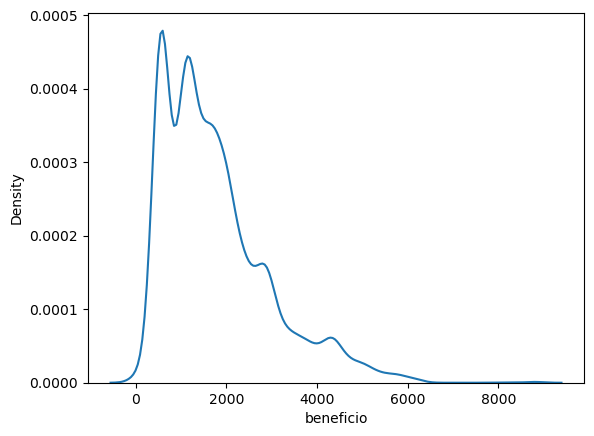

In [83]:
import seaborn as sns

sns.kdeplot(data=df, x='beneficio')

<Axes: xlabel='limite', ylabel='Density'>

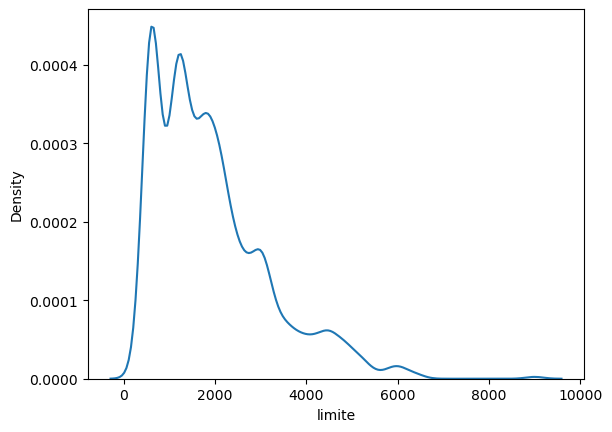

In [84]:
sns.kdeplot(data=df, x='limite')

<Axes: xlabel='gastado', ylabel='Density'>

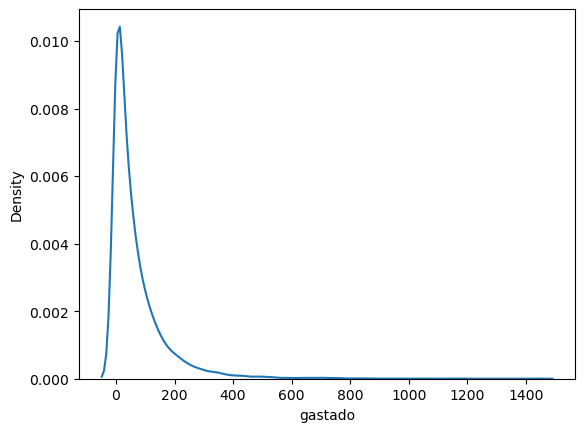

In [85]:
sns.kdeplot(data=df, x='gastado')

In [86]:
df.groupby(['mes'])['id_cliente'].count()

mes
0     896
1     896
2     896
3     896
4     896
5     896
6     882
7     868
8     863
9     849
10    842
11    836
Name: id_cliente, dtype: int64

<h2 style="color: red;">Comentarios</h2>

Aclaraciones iniciales:

1. No teniendo expertise en el sector bancario o de riesgo, el término "beneficio" parece estar siendo utilizado de manera incorrecta, ya que probablemente se refiere al crédito no utilizado, es decir, la diferencia entre el límite y lo gastado. En el contexto de riesgo, este "beneficio" podría estar actuando como un indicador de exposición al crédito o capacidad de gasto futura. 
La distribución del "beneficio" y límite remanente es muy similar aunque levemente diferente:
```python
        df['limite_remanente'] = df['limite'] - df['gastado']

        df['beneficio'].hist(bins=30);
        df['limite_remanente'].hist(bins=30);
```
2. Considero que debería generarse la combinación completa de clientes*mes para observar el panorama completo. Hay muchos clientes que no están presentes de los meses 6 al 11 (A menos que sean clientes nuevos):

```python
        df.groupby(['mes'])['id_cliente'].count()
```


En cuanto a los density plots, estos indican que la mayor parte de los clientes gastan significativamente menos del límite que se les otorga.
Esto indica una asignación de crédito ineficiente, y puede ser una oportunidad para optimizar los recursos y el capital del banco.

Incluso si en lugar de observar los datos como KDE, se observaran como histogramas, se vería mucho mejor que muchos contratos tienen gasto 0.

**Código:**

En cuanto al código en si, los tres plots podrían generarse en una misma celda para mejor comparación de esta manera:

```python
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        for i, col in enumerate(['beneficio', 'gastado', 'limite']):
            axes[i].hist(df[col], bins=50) # o sns.kdeplot(data=df, x=col, fill=True, ax=axes[i])
            axes[i].set_title(col)
        plt.show()


Text(0, 0.5, 'Frecuencia')

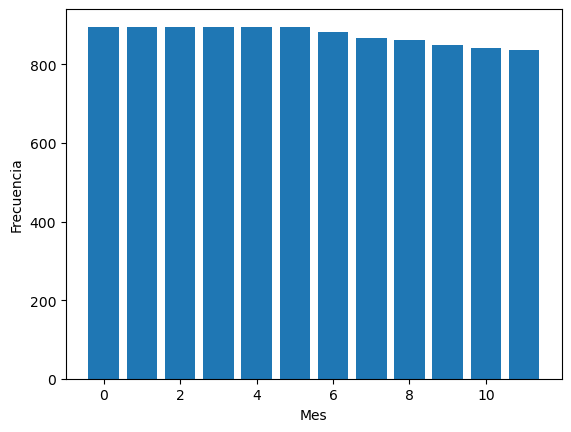

In [87]:
conteo_mes = {}
for value in df['mes']:
    if value in conteo_mes:
        conteo_mes[value] += 1
    else:
        conteo_mes[value] = 1

meses = []
frecuencia = []
for mes, freq in conteo_mes.items():
    meses.append(mes)
    frecuencia.append(freq)
    
from matplotlib import pyplot as plt

plt.bar(meses, frecuencia)
plt.xlabel('Mes')
plt.ylabel('Frecuencia')

<h2 style="color: red;">Comentarios</h2>

Este gráfico indica que el número de contratos por mes es relativamente estable, la disminución que se observa hacia el mes 11 puede deberse a los clientes faltantes mencionados anteriormente.

**Código:**

En cuanto al código, este mismo gráfico podría crearse en una sola línea:

```python
        sns.countplot(data=df, x='mes')

# Análisi del beneficio

Text(0, 0.5, 'beneficio')

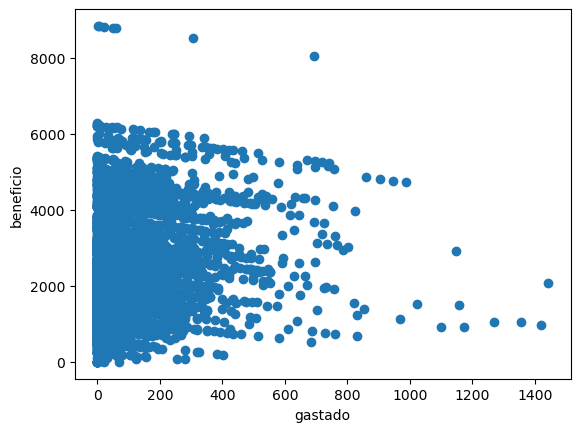

In [88]:
plt.scatter(x=df['gastado'], y=df['beneficio'])
plt.xlabel('gastado')
plt.ylabel('beneficio')

In [89]:
df_cliente = df.groupby('id_cliente').apply(lambda x: pd.Series({
    'beneficio': x['beneficio'].sum(),
    'gastado': x['gastado'].sum(),
    'limite': x['gastado'].max()
})).reset_index()
df_cliente

/tmp/ipykernel_42310/2522467317.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_cliente = df.groupby('id_cliente').apply(lambda x: pd.Series({


,id_cliente,beneficio,gastado,limite
0,1,41636.70,501.00,108.04
1,3,13639.24,441.97,95.63
2,29,6556.12,295.15,60.04
3,30,42901.16,2475.10,319.02
4,40,13923.18,187.93,45.46
...,...,...,...,...
891,9192,3098.13,351.87,108.70
892,9194,15120.30,2428.38,630.39
893,9206,6136.10,1180.74,288.37
894,9207,8967.59,1832.41,760.01


Text(0, 0.5, 'beneficio')

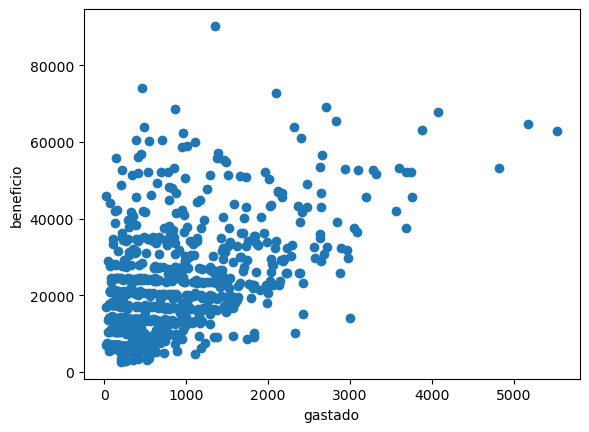

In [14]:
plt.scatter(x=df_cliente['gastado'], y=df_cliente['beneficio'])
plt.xlabel('gastado')
plt.ylabel('beneficio')

Text(0, 0.5, 'beneficio')

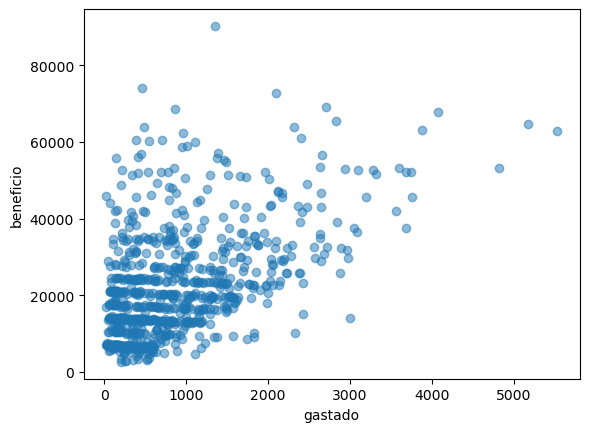

In [100]:
df_cliente_ = df.groupby('id_cliente')[["beneficio", "limite", "gastado"]].sum()

plt.scatter(x=df_cliente_['gastado'], y=df_cliente_['beneficio'], alpha=0.5)
plt.xlabel('gastado')
plt.ylabel('beneficio')

<h2 style="color: red;">Comentarios</h2>

No hay una correlación clara entre el monto gastado y el beneficio en términos generales (Scatter #1) pero sí cuando se evalúa a nivel cliente. Se observa una correlación positiva en este caso (Scatter #2).

**Código:**

No es claro (o es incorrecto) porqué el re-crear la variable "límite" de esta manera en el dataframe de clientes:

```python
        'limite': x['gastado'].max()
```

Considera más claro y simple crearlo de esta forma:
```python
        df_cliente = df.groupby('id_cliente')[["beneficio", "limite", "gastado"]].sum()
```

También sería provechoso agregar un "alpha=0.5" al scatterplot para observar zonas de superposición de puntos.

# Disposición del porcentaje del límite gastado

[0.04096090084820123, 0.01925908452763966, 0.012847353027200935, 0.008981800233986545, 0.00671372682070781, 0.00567307204835722, 0.004840707075359127, 0.0042259551408049675, 0.0036465037083121855, 0.003089540043338034, 0.003031748966922656, 0.00335608484358853]


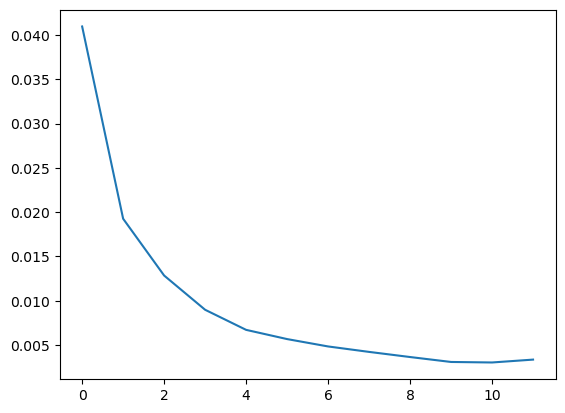

In [115]:
usado = []
for mes in np.unique(df['mes']):
    usado.append( df.loc[df['mes'] == mes]['gastado'].sum() / df.loc[df['mes'] <= mes]['limite'].sum() )

plt.plot(usado)
print(usado)

<h2 style="color: red;">Comentarios</h2>

En este caso no logro comprender la finalidad del gráfico. Si se quieren evaluar patrones temporales en el porcentaje del uso del crédito, considero que es más intuitivo intentar graficar el porcentaje de credito gastado mes a mes.

Para lo cual se podría modificar el código proporcionado y cambiar sum() por mean().

O realizar el análisis de cualquiera de las siguientes dos formas:

```python
        gastado_por_mes = df.groupby('mes')['gastado'].sum()
        limite_por_mes = df.groupby('mes')['limite'].sum()
        plt.plot(gastado_por_mes / limite_por_mes)
```
---
```python
        df['porcentaje_gastado'] = df['gastado'] / df['limite']
        df.groupby('mes')['porcentaje_gastado'].mean().plot()
```
---

Este análisis permite una comparación clara del comportamiento mensual y la identificación de posibles patrones.

Por ejemplo, en este caso, parece ser que tanto en los meses actuales (0,1,2) como hace casi un año (meses 10,11) el porcentaje de crédito gastado ha sido mayor (tal vez coincida con una temporada -verano por ej-)